### TODO:

We need to create a graph-based representation of the galaxy.

okay It's a web, 3D

- Select an item
- Download its history. Identify periods of spiking up/down
- Label them for anomoly detection 

We have aggregate data for all the regions. These are our node features
- Region trade hub price data
- Faction warfare stats
- Item destroyed stats
- Monthly economic report data
- Every relevant player activity statistic
- Daily playercount
- Date



Extension:
- Special event calendar
- Include order book data. Competition (5min, 30min, 1 hour etc..), buy2sell, sell2buy vol etc etc. Everything Adam4eve does.
- Reddit/Discord activity? 


Aim is to create a graph of regions, use graphSAGE? spatiotemporal convolutional graph network. Works over player activity data + price history for each region. 

In [ ]:
# Loop over every solar system file. Extract solar system ID, position, and stargates (gate ID + destination gate ID). Add regionID and constellationID

# Create a dictionary of all solar systems.

# Match solar systems with linked stargates.

# Generate graph.

In [2]:
import pickle as pkl
# Path to the pickle file you want to load
file_path = 'Graphs/datasets/price_data_Branch.pkl'  # Replace 'price_data_example.pkl' with your specific file name

# Load the data from the pickle file
with open(file_path, 'rb') as file:
    price_data = pkl.load(file)

TypeError: Argument 'placement' has incorrect type (expected pandas._libs.internals.BlockPlacement, got slice)

In [1]:
import pandas as pd
import yaml
import os

def extract_constellationID(filename):
    
    print("Extracting constellation ID from file:", filename)
    
    with open(filename, 'r') as file:
        data = yaml.safe_load(file)
        return data.get('constellationID', None)
def extract_regionID(filename):
    with open(filename, 'r') as file:
        data = yaml.safe_load(file)
        return data.get('regionID', None)
    

def process_solar_system(filename, constellation_name, constellation_ID, region_name, region_ID):
    with open(filename, 'r') as file:
        parent_dir_name = os.path.basename(os.path.dirname(filename))
        print("Processing solar system:", parent_dir_name)
        
        data = yaml.safe_load(file)
        
        stargates = data.get('stargates', {})
        solar_system_id = data.get('solarSystemID')
        solar_system_coordinates = data.get('center', {})
        solar_system_name = parent_dir_name

        solarsystem_dict = {
            'solarsystem_name': solar_system_name,
            'solarsystem_ID': solar_system_id,
            'constellation_name': constellation_name,
            'constellation_ID': constellation_ID,
            'region_name': region_name,
            'region_ID': region_ID,
            'solarsystem_coordinates': solar_system_coordinates,
            'stargates': {stargate_id: {'destinationID': stargate_info.get('destination', None)} for stargate_id, stargate_info in stargates.items()}
        }
        
        return solarsystem_dict, solar_system_name

def process_constellation(constellation_directory, constellation_name, region_name, region_ID):
    constellation_dict = {}    
    constellation_file = 'constellation.staticdata'
    
    constellation_ID = extract_constellationID(os.path.join(constellation_directory, constellation_file)) 

    
    
    print("Processing constellation:", constellation_name)
    
    for root, dirs, files in os.walk(constellation_directory):
        for file in files:
            if file.endswith('.staticdata'):
                file_path = os.path.join(root, file)
                if 'solarsystem' in file:
                    solar_system_dict, solar_system_name = process_solar_system(file_path, constellation_name, constellation_ID, region_name, region_ID)
                    constellation_dict[solar_system_name] = solar_system_dict
    
    return constellation_dict




def process_region(region_path):
    region_dict = {}
    
    region_name = os.path.basename(region_path)
    region_ID = extract_regionID(os.path.join(region_path, 'region.staticdata'))
    
    print("Processing region file:", region_path)
    
    for constellation in os.listdir(region_path):
        
        print("Process_Region() - Processing constellation:", constellation)
        constellation_directory = os.path.join(region_path, constellation)
        print("Constillation path: ", constellation_directory)
        
        if os.path.isdir(constellation_directory):
            constellation_dict = process_constellation(constellation_directory, constellation, region_name, region_ID)
            region_dict[constellation] = constellation_dict
    
    return region_dict





def process_galaxy(base_directory):
    galaxy_dict = {}
    
    print("Processing galaxy: ", base_directory)
    for region in os.listdir(base_directory):
        print("Processing region:", region)
        region_directory = os.path.join(base_directory, region)
        if os.path.isdir(region_directory):
            # region_dict = process_region(region_directory)
            galaxy_dict[region] = process_region(region_directory)
    
    return galaxy_dict


In [ ]:
file = r'C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sde\fsd\universe\eve\Aridia\region.staticdata'

if os.path.isdir(file):
    print("True")
else:
    print("False")


In [272]:
# Usage example:
galaxy_path = r'C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sde\fsd\universe\eve'  # Replace with the actual path
# galaxy_dict = process_galaxy(galaxy_path)
# print(galaxy_dict)

Processing galaxy:  C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sde\fsd\universe\eve
Processing region: A821-A
Processing region file: C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sde\fsd\universe\eve\A821-A
Process_Region() - Processing constellation: 6I-9Y2
Constillation path:  C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sde\fsd\universe\eve\A821-A\6I-9Y2
Extracting constellation ID from file: C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sde\fsd\universe\eve\A821-A\6I-9Y2\constellation.staticdata
Processing constellation: 6I-9Y2
Processing solar system: E-RPGP
Processing solar system: KER-EU
Processing solar system: NSE-U1
Processing solar system: R79-I7
Processing solar system: UC-X28
Processing solar system: ZV-KZO
Process_Region() - Processing constellation: 826-A5
Constillation path:  C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sde\fsd\universe\eve\A821-A\826-A5
Extracting constellation ID from file: C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sd

In [239]:
# Usage example:
aridia_path = r'C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sde\fsd\universe\eve\Aridia'  # Replace with the actual path
aridia_dict, aridia_name = process_region(aridia_path)
print(aridia_dict)

Processing region file: C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sde\fsd\universe\eve\Aridia
Test 1: Processing constellation: Afinoo
constillation path:  C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sde\fsd\universe\eve\Aridia\Afinoo
Extracting constellation ID from file: C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sde\fsd\universe\eve\Aridia\Afinoo\constellation.staticdata
Processing constellation: Afinoo
Processing solar system: Gens
Processing solar system: Hier
Processing solar system: Jasson
Processing solar system: Kamih
Processing solar system: Kenahehab
Processing solar system: Yehaba
Test 1: Processing constellation: Anama
constillation path:  C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sde\fsd\universe\eve\Aridia\Anama
Extracting constellation ID from file: C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sde\fsd\universe\eve\Aridia\Anama\constellation.staticdata
Processing constellation: Anama
Processing solar system: Maalna
Processing solar syste

In [263]:
import networkx as nx
import matplotlib.pyplot as plt

def process_connections(region_dict):
    # This dictionary will map stargate IDs to their respective solar system IDs
    # i.e. the key is the stargate ID and the value is the solar system ID where the stargate lives
    stargate_to_system = {} 
    
    # This dictionary will hold the connections between solar systems
    connections = []
    
    for constellation_name, constellation_dict in region_dict.items():
        print("Processing constellation: ", constellation_name)
        
        for solar_system_name, solar_system_dict in constellation_dict.items():
            print("Processing solar system: ", solar_system_name)
            
            for stargate_id, stargate_data in solar_system_dict['stargates'].items():
                print(stargate_id, stargate_data)
                stargate_to_system[stargate_id] = solar_system_name
        
        
    for constellation, constellation_dict in region_dict.items():
        # Now create the connections based on the stargate to system mapping
        print("Processing constellation connections: ", constellation)
        
        for solar_system_name, solar_system_dict in constellation_dict.items():
            
            print("Processing solar system connections: ", solar_system_name)
            
            for stargate_id, stargate_destination in solar_system_dict['stargates'].items():
                
                # stargate_destination = stargate_destination['destinationID']
                
                if stargate_destination['destinationID'] in stargate_to_system:
                    
                    # source_system_name = solar_system_name
                    # source_system_id = solar_system_data['solarsystem_ID']
                    # destination_system = stargate_to_system[stargate_destination['destinationID']]
                    connections.append((solar_system_name, stargate_to_system[stargate_destination['destinationID']]))
    
    return connections, stargate_to_system




In [2]:
aridia_dict['Afinoo'].keys()

NameError: name 'aridia_dict' is not defined

In [264]:
connections, stargate_to_system = process_connections(aridia_dict)

Processing constellation:  Afinoo
Processing solar system:  Gens
50010925 {'destinationID': 50010610}
50010926 {'destinationID': 50010791}
50010927 {'destinationID': 50010939}
Processing solar system:  Hier
50010966 {'destinationID': 50010940}
50010967 {'destinationID': 50011016}
50010968 {'destinationID': 50011347}
Processing solar system:  Jasson
50010969 {'destinationID': 50010792}
50010970 {'destinationID': 50010941}
50010971 {'destinationID': 50011090}
Processing solar system:  Kamih
50010939 {'destinationID': 50010927}
50010940 {'destinationID': 50010966}
50010941 {'destinationID': 50010970}
50010942 {'destinationID': 50011261}
Processing solar system:  Kenahehab
50010790 {'destinationID': 50010609}
50010791 {'destinationID': 50010926}
50010792 {'destinationID': 50010969}
Processing solar system:  Yehaba
50010608 {'destinationID': 50010441}
50010609 {'destinationID': 50010790}
50010610 {'destinationID': 50010925}
Processing constellation:  Anama
Processing solar system:  Maalna
5

In [257]:
stargate_to_system

{50010925: 'Gens',
 50010926: 'Gens',
 50010927: 'Gens',
 50010966: 'Hier',
 50010967: 'Hier',
 50010968: 'Hier',
 50010969: 'Jasson',
 50010970: 'Jasson',
 50010971: 'Jasson',
 50010939: 'Kamih',
 50010940: 'Kamih',
 50010941: 'Kamih',
 50010942: 'Kamih',
 50010790: 'Kenahehab',
 50010791: 'Kenahehab',
 50010792: 'Kenahehab',
 50010608: 'Yehaba',
 50010609: 'Yehaba',
 50010610: 'Yehaba',
 50010528: 'Maalna',
 50010529: 'Maalna',
 50010531: 'Maseera',
 50010532: 'Maseera',
 50010533: 'Maseera',
 50010294: 'Shakasi',
 50010295: 'Shakasi',
 50010296: 'Shakasi',
 50010440: 'Shirshocin',
 50010441: 'Shirshocin',
 50013629: 'Shirshocin',
 50010274: 'Van',
 50010275: 'Van',
 50010276: 'Van',
 50010423: 'Zayi',
 50010424: 'Zayi',
 50010425: 'Zayi',
 50013166: 'Anath',
 50013167: 'Anath',
 50013608: 'Anath',
 50012867: 'Efu',
 50012868: 'Efu',
 50013097: 'Naga',
 50013098: 'Naga',
 50013099: 'Naga',
 50013100: 'Naga',
 50013272: 'Omigiav',
 50013273: 'Omigiav',
 50012997: 'Sakht',
 50012998: '

In [258]:
connections

[('Afrah', 'Nema'),
 ('Afrah', 'Soliara'),
 ('Nema', 'Hier'),
 ('Nema', 'Shenda'),
 ('Nema', 'Afrah'),
 ('Nema', 'Sota'),
 ('Rashagh', 'Shenda'),
 ('Rashagh', 'Sazilid'),
 ('Rashagh', 'Sota'),
 ('Sazilid', 'Shenda'),
 ('Sazilid', 'Rashagh'),
 ('Sazilid', 'Nalnifan'),
 ('Shenda', 'Nema'),
 ('Shenda', 'Rashagh'),
 ('Shenda', 'Sazilid'),
 ('Sota', 'Nema'),
 ('Sota', 'Rashagh'),
 ('Afrah', 'Nema'),
 ('Afrah', 'Soliara'),
 ('Nema', 'Hier'),
 ('Nema', 'Shenda'),
 ('Nema', 'Afrah'),
 ('Nema', 'Sota'),
 ('Rashagh', 'Shenda'),
 ('Rashagh', 'Sazilid'),
 ('Rashagh', 'Sota'),
 ('Sazilid', 'Shenda'),
 ('Sazilid', 'Rashagh'),
 ('Sazilid', 'Nalnifan'),
 ('Shenda', 'Nema'),
 ('Shenda', 'Rashagh'),
 ('Shenda', 'Sazilid'),
 ('Sota', 'Nema'),
 ('Sota', 'Rashagh'),
 ('Afrah', 'Nema'),
 ('Afrah', 'Soliara'),
 ('Nema', 'Hier'),
 ('Nema', 'Shenda'),
 ('Nema', 'Afrah'),
 ('Nema', 'Sota'),
 ('Rashagh', 'Shenda'),
 ('Rashagh', 'Sazilid'),
 ('Rashagh', 'Sota'),
 ('Sazilid', 'Shenda'),
 ('Sazilid', 'Rashagh'),
 (

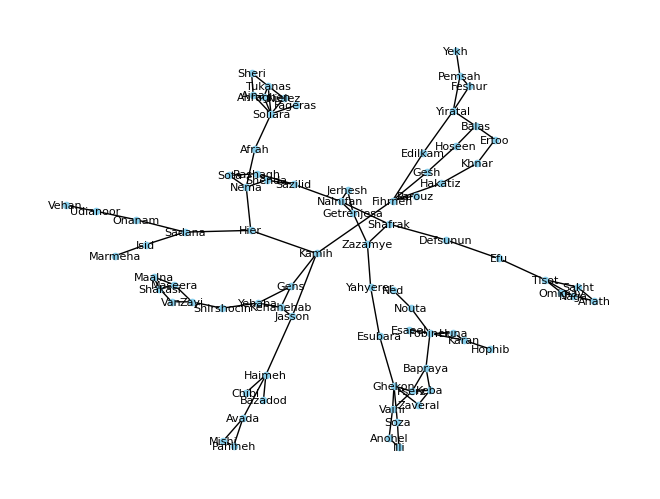

In [265]:
def plot_connections(connections):
    # Create a network graph
    G = nx.Graph()
    G.add_edges_from(connections)
    
    # Draw the graph
    pos = nx.spring_layout(G)  # Use Fruchterman-Reingold force-directed algorithm to position the nodes
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=20, edge_color='k', font_size=8)
    plt.show()



plot_connections(connections)

In [273]:
import networkx as nx
import matplotlib.pyplot as plt

def process_connections_galaxy(galaxy_dict):
    # This dictionary will map stargate IDs to their respective solar system IDs
    # i.e. the key is the stargate ID and the value is the solar system ID where the stargate lives
    stargate_to_system = {} 
    
    # This dictionary will hold the connections between solar systems
    connections = []
    
    for region_name, region_dict in galaxy_dict.items():
        for constellation_name, constellation_dict in region_dict.items():
            print("Processing constellation: ", constellation_name)
            
            for solar_system_name, solar_system_dict in constellation_dict.items():
                print("Processing solar system: ", solar_system_name)
                
                for stargate_id, stargate_data in solar_system_dict['stargates'].items():
                    print(stargate_id, stargate_data)
                    stargate_to_system[stargate_id] = solar_system_name
        
    for region_name, region_dict in galaxy_dict.items():
        for constellation, constellation_dict in region_dict.items():
            # Now create the connections based on the stargate to system mapping
            print("Processing constellation connections: ", constellation)
            
            for solar_system_name, solar_system_dict in constellation_dict.items():
                
                print("Processing solar system connections: ", solar_system_name)
                
                for stargate_id, stargate_destination in solar_system_dict['stargates'].items():
                    
                    # stargate_destination = stargate_destination['destinationID']
                    
                    if stargate_destination['destinationID'] in stargate_to_system:
                        
                        # source_system_name = solar_system_name
                        # source_system_id = solar_system_data['solarsystem_ID']
                        # destination_system = stargate_to_system[stargate_destination['destinationID']]
                        connections.append((solar_system_name, stargate_to_system[stargate_destination['destinationID']]))
    
    return connections, stargate_to_system


In [274]:
galaxy_connections, galaxy_stargate_to_system = process_connections_galaxy(galaxy_dict)

Processing constellation:  6I-9Y2
Processing solar system:  E-RPGP
Processing solar system:  KER-EU
Processing solar system:  NSE-U1
Processing solar system:  R79-I7
Processing solar system:  UC-X28
Processing solar system:  ZV-KZO
Processing constellation:  826-A5
Processing solar system:  2RV-06
Processing solar system:  8U-RZH
Processing solar system:  B-Y06L
Processing solar system:  CLDT-L
Processing solar system:  DT-7EO
Processing solar system:  HHQ-8L
Processing solar system:  QU7-EE
Processing solar system:  Z-KPAR
Processing constellation:  B9J-NT
Processing solar system:  5V-YL6
Processing solar system:  69A-54
Processing solar system:  8-UWFS
Processing solar system:  BWO-UU
Processing solar system:  M9-OS2
Processing solar system:  PQWA-L
Processing solar system:  SQVI-U
Processing constellation:  F-0CTG
Processing solar system:  0IRK-R
Processing solar system:  3-CE1R
Processing solar system:  50-TJY
Processing solar system:  7BA-TK
Processing solar system:  FNS3-F
Proces

In [286]:
galaxy_connections

[('Gens', 'Yehaba'),
 ('Gens', 'Kenahehab'),
 ('Gens', 'Kamih'),
 ('Hier', 'Kamih'),
 ('Hier', 'Sadana'),
 ('Hier', 'Nema'),
 ('Jasson', 'Kenahehab'),
 ('Jasson', 'Kamih'),
 ('Jasson', 'Haimeh'),
 ('Kamih', 'Gens'),
 ('Kamih', 'Hier'),
 ('Kamih', 'Jasson'),
 ('Kamih', 'Fihrneh'),
 ('Kenahehab', 'Yehaba'),
 ('Kenahehab', 'Gens'),
 ('Kenahehab', 'Jasson'),
 ('Yehaba', 'Shirshocin'),
 ('Yehaba', 'Kenahehab'),
 ('Yehaba', 'Gens'),
 ('Maalna', 'Shakasi'),
 ('Maalna', 'Maseera'),
 ('Maseera', 'Shakasi'),
 ('Maseera', 'Zayi'),
 ('Maseera', 'Maalna'),
 ('Shakasi', 'Van'),
 ('Shakasi', 'Maalna'),
 ('Shakasi', 'Maseera'),
 ('Shirshocin', 'Zayi'),
 ('Shirshocin', 'Yehaba'),
 ('Shirshocin', 'Agaullores'),
 ('Van', 'Otakod'),
 ('Van', 'Shakasi'),
 ('Van', 'Zayi'),
 ('Zayi', 'Van'),
 ('Zayi', 'Shirshocin'),
 ('Zayi', 'Maseera'),
 ('Anath', 'Sakht'),
 ('Anath', 'Naga'),
 ('Anath', 'Rafeme'),
 ('Efu', 'Defsunun'),
 ('Efu', 'Tisot'),
 ('Naga', 'Tisot'),
 ('Naga', 'Sakht'),
 ('Naga', 'Anath'),
 ('Naga',

In [284]:
graph = nx.Graph()
graph.add_edges_from(galaxy_connections)

In [288]:
aggregate_solarsystem_dict = {}

for region_name, region_dict in galaxy_dict.items():
    for constellation_name, constellation_dict in region_dict.items():
        print("Processing constellation: ", constellation_name)
        
        for solar_system_name, solar_system_dict in constellation_dict.items():
            print("Processing solar system: ", solar_system_name)
            aggregate_solarsystem_dict[solar_system_name] = solar_system_dict


Processing constellation:  6I-9Y2
Processing solar system:  E-RPGP
Processing solar system:  KER-EU
Processing solar system:  NSE-U1
Processing solar system:  R79-I7
Processing solar system:  UC-X28
Processing solar system:  ZV-KZO
Processing constellation:  826-A5
Processing solar system:  2RV-06
Processing solar system:  8U-RZH
Processing solar system:  B-Y06L
Processing solar system:  CLDT-L
Processing solar system:  DT-7EO
Processing solar system:  HHQ-8L
Processing solar system:  QU7-EE
Processing solar system:  Z-KPAR
Processing constellation:  B9J-NT
Processing solar system:  5V-YL6
Processing solar system:  69A-54
Processing solar system:  8-UWFS
Processing solar system:  BWO-UU
Processing solar system:  M9-OS2
Processing solar system:  PQWA-L
Processing solar system:  SQVI-U
Processing constellation:  F-0CTG
Processing solar system:  0IRK-R
Processing solar system:  3-CE1R
Processing solar system:  50-TJY
Processing solar system:  7BA-TK
Processing solar system:  FNS3-F
Proces

In [289]:
aggregate_solarsystem_dict['Gens']

{'solarsystem_name': 'Gens',
 'solarsystem_ID': 30004238,
 'constellation_name': 'Afinoo',
 'constellation_ID': 20000620,
 'region_name': 'Aridia',
 'region_ID': 10000054,
 'solarsystem_coordinates': [-3.527837696173254e+17,
  3.5635483315931108e+16,
  -4.857238702698633e+16],
 'stargates': {50010925: {'destinationID': 50010610},
  50010926: {'destinationID': 50010791},
  50010927: {'destinationID': 50010939}}}

In [290]:
for node in graph.nodes:
    print(node)
    
    solar_system_name = aggregate_solarsystem_dict[node]['solarsystem_name']
    solar_system_ID = aggregate_solarsystem_dict[node]['solarsystem_ID']
    
    region_name = aggregate_solarsystem_dict[node]['region_name']
    region_ID = aggregate_solarsystem_dict[node]['region_ID']
    
    constellation_name = aggregate_solarsystem_dict[node]['constellation_name']
    constellation_ID = aggregate_solarsystem_dict[node]['constellation_ID']
    
    system_coordinates = aggregate_solarsystem_dict[node]['solarsystem_coordinates']

    node_attributes = {
        'solar_system_name': solar_system_name,
        'solar_system_ID': solar_system_ID,
        'region_name': region_name,
        'region_ID': region_ID,
        'constellation_name': constellation_name,
        'constellation_ID': constellation_ID,
        'system_coordinates': system_coordinates}
    nx.set_node_attributes(graph, {node: node_attributes})

Gens
Yehaba
Kenahehab
Kamih
Hier
Sadana
Nema
Jasson
Haimeh
Fihrneh
Shirshocin
Maalna
Shakasi
Maseera
Zayi
Van
Agaullores
Otakod
Anath
Sakht
Naga
Rafeme
Efu
Defsunun
Tisot
Omigiav
1-SMEB
Ahraghen
Soliara
Tukanas
Ajna
Sheri
Fageras
Nielez
Afrah
Shafrak
Esubara
Yahyerer
Ghekon
Getrenjesa
Nalnifan
Jerhesh
Zazamye
Sazilid
Anohel
Vaini
Illi
Bapraya
Pserz
Keba
Fobiner
Zaveral
Soza
Isid
Marmeha
Onanam
Udianoor
Vehan
Zinkon
Avada
Mishi
Pahineh
Bazadod
Chibi
Balas
Ertoo
Yiratal
Hoseen
Edilkam
Khnar
Feshur
Pemsah
Parouz
Hakatiz
Gesh
Yekh
Esaeel
Huna
Karan
Nouta
Hophib
D4KU-5
Ned
Shenda
Sota
Rashagh
Astoh
Tsuruma
Uuhulanen
Onnamon
Kinakka
Rohamaa
Piak
Uchomida
Samanuni
Ikoskio
Athounon
Eha
Martoh
Innia
Oicx
Pavanakka
Iralaja
Raihbaka
Kehjari
Aivonen
Ohbochi
Akidagi
Nennamaila
Enaluri
Hallanen
Hikkoken
Immuri
Pynekastoh
Aldranette
Asakai
Prism
Elunala
Okkamon
Mushikegi
Vaaralen
Manjonakko
Reitsato
Teskanen
Hirri
Nisuwa
Kedama
Iwisoda
Rakapas
Teimo
Tama
Oinasiken
Notoras
Abune
Ashitsu
Hykanima
Ienak

In [295]:
graph.nodes['Hophib']

{'solar_system_name': 'Hophib',
 'solar_system_ID': 30004309,
 'region_name': 'Aridia',
 'region_ID': 10000054,
 'constellation_name': 'Selonat',
 'constellation_ID': 20000629,
 'system_coordinates': [-4.190732392259216e+17,
  2.0551498372514348e+16,
  -6.930999217313023e+16]}

In [294]:
print(graph)

Graph with 5215 nodes and 6888 edges


In [296]:
nx.write_gml(graph, 'galaxy_graph_v2.gml')

In [354]:
# Iterate over all nodes and their attributes
region_dict = {}

for node, attrs in graph.nodes(data=True):
    print(f"Node {node} has region_name {attrs['region_name']} region_ID {attrs['region_ID']}")
    region_dict[node] = {}
    region_dict[node]['region_name'] = attrs['region_name']
    region_dict[node]['region_ID'] = attrs['region_ID'] 
    

Node Gens has region_name Aridia region_ID 10000054
Node Yehaba has region_name Aridia region_ID 10000054
Node Kenahehab has region_name Aridia region_ID 10000054
Node Kamih has region_name Aridia region_ID 10000054
Node Hier has region_name Aridia region_ID 10000054
Node Sadana has region_name Aridia region_ID 10000054
Node Nema has region_name Aridia region_ID 10000054
Node Jasson has region_name Aridia region_ID 10000054
Node Haimeh has region_name Aridia region_ID 10000054
Node Fihrneh has region_name Aridia region_ID 10000054
Node Shirshocin has region_name Aridia region_ID 10000054
Node Maalna has region_name Aridia region_ID 10000054
Node Shakasi has region_name Aridia region_ID 10000054
Node Maseera has region_name Aridia region_ID 10000054
Node Zayi has region_name Aridia region_ID 10000054
Node Van has region_name Aridia region_ID 10000054
Node Agaullores has region_name Solitude region_ID 10000044
Node Otakod has region_name Genesis region_ID 10000067
Node Anath has region_n

In [357]:
print(region_dict)

{'Gens': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Yehaba': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Kenahehab': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Kamih': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Hier': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Sadana': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Nema': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Jasson': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Haimeh': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Fihrneh': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Shirshocin': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Maalna': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Shakasi': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Maseera': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Zayi': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Van': {'region_name': 'Aridia', 'region_ID': 10000054}, 'Agaullores': {'region_name': 'Solitude',

In [359]:
for system_name, system_dict in region_dict.items():
    print(system_name, system_dict)
    system_dict['region_ID']
    

Gens {'region_name': 'Aridia', 'region_ID': 10000054}
Yehaba {'region_name': 'Aridia', 'region_ID': 10000054}
Kenahehab {'region_name': 'Aridia', 'region_ID': 10000054}
Kamih {'region_name': 'Aridia', 'region_ID': 10000054}
Hier {'region_name': 'Aridia', 'region_ID': 10000054}
Sadana {'region_name': 'Aridia', 'region_ID': 10000054}
Nema {'region_name': 'Aridia', 'region_ID': 10000054}
Jasson {'region_name': 'Aridia', 'region_ID': 10000054}
Haimeh {'region_name': 'Aridia', 'region_ID': 10000054}
Fihrneh {'region_name': 'Aridia', 'region_ID': 10000054}
Shirshocin {'region_name': 'Aridia', 'region_ID': 10000054}
Maalna {'region_name': 'Aridia', 'region_ID': 10000054}
Shakasi {'region_name': 'Aridia', 'region_ID': 10000054}
Maseera {'region_name': 'Aridia', 'region_ID': 10000054}
Zayi {'region_name': 'Aridia', 'region_ID': 10000054}
Van {'region_name': 'Aridia', 'region_ID': 10000054}
Agaullores {'region_name': 'Solitude', 'region_ID': 10000044}
Otakod {'region_name': 'Genesis', 'region_ID

In [361]:

seen_values = set()
filtered_regions = {}
for solar_system_name, system_dict in region_dict.items():
    print(system_name, system_dict)
    if system_dict['region_ID'] not in seen_values:
        seen_values.add(system_dict['region_ID'])
        filtered_regions[system_dict['region_name']] = system_dict['region_ID']

print(filtered_regions)

UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Aridia', 'region_ID': 10000054}
UY5A-D {'region_name': 'Solitude', 'region_ID': 10000044}
UY5A-D {'region_name': 'Genesis', 'region_ID':

In [363]:
print(filtered_regions)

{'Aridia': 10000054, 'Solitude': 10000044, 'Genesis': 10000067, 'Khanid': 10000049, 'Delve': 10000060, 'Kor-Azor': 10000065, 'Fountain': 10000058, 'BlackRise': 10000069, 'Lonetrek': 10000016, 'Placid': 10000048, 'TheCitadel': 10000033, 'Essence': 10000064, 'CloudRing': 10000051, 'Branch': 10000055, 'Tenal': 10000045, 'Venal': 10000015, 'Deklein': 10000035, 'Cache': 10000007, 'TheSpire': 10000018, 'GreatWildlands': 10000011, 'Insmother': 10000009, 'OuterPassage': 10000021, 'Catch': 10000014, 'Stain': 10000022, 'Querious': 10000050, 'Curse': 10000012, 'Immensea': 10000025, 'Providence': 10000047, 'Impass': 10000031, 'Tenerifis': 10000061, 'Fade': 10000046, 'PureBlind': 10000023, 'Syndicate': 10000041, 'OuterRing': 10000057, 'CobaltEdge': 10000053, 'Oasa': 10000040, 'ScaldingPass': 10000008, 'YasnaZakh': 10001000, 'Derelik': 10000001, 'PeriodBasis': 10000063, 'Devoid': 10000036, 'Heimatar': 10000030, 'MoldenHeath': 10000028, 'Detorid': 10000005, 'WickedCreek': 10000006, 'Domain': 10000043

In [365]:
# Iterate over nodes in the graph
for node in graph.nodes:
    # Get the region name from the node's attributes
    region_name = graph.nodes[node]['region_name']
    
    # Get the corresponding region ID from the filtered_regions dictionary
    # Here we assume that every region_name will have a corresponding region_ID
    region_ID = filtered_regions[region_name]
    
    # Update the node with the region_ID as a new attribute
    graph.nodes[node]['region_ID'] = region_ID

In [366]:
# Iterate over nodes in the graph
for node in graph.nodes:
    # Get the region name from the node's attributes
    region_name = graph.nodes[node]['region_name']
    
    # Get the corresponding region ID from the filtered_regions dictionary
    # Here we assume that every region_name will have a corresponding region_ID
    region_ID = filtered_regions[region_name]
    
    # Update the node with the region_ID as a new attribute
    graph.nodes[node]['region_ID'] = region_ID
# Print all nodes with their attributes to verify
for node, attrs in graph.nodes(data=True):
    print(f"Node {node} has attributes {attrs}")


Node Gens has attributes {'solar_system_name': 'Gens', 'solar_system_ID': 30004238, 'region_name': 'Aridia', 'region_ID': 10000054, 'constellation_name': 'Afinoo', 'constellation_ID': 20000620, 'system_coordinates': [-3.527837696173254e+17, 3.5635483315931108e+16, -4.857238702698633e+16]}
Node Yehaba has attributes {'solar_system_name': 'Yehaba', 'solar_system_ID': 30004236, 'region_name': 'Aridia', 'region_ID': 10000054, 'constellation_name': 'Afinoo', 'constellation_ID': 20000620, 'system_coordinates': [-3.31143599305e+17, 2.14990832203e+16, -4.00632031358e+16]}
Node Kenahehab has attributes {'solar_system_name': 'Kenahehab', 'solar_system_ID': 30004237, 'region_name': 'Aridia', 'region_ID': 10000054, 'constellation_name': 'Afinoo', 'constellation_ID': 20000620, 'system_coordinates': [-3.425736391241735e+17, 2.828963265354593e+16, -4.6808947844100856e+16]}
Node Kamih has attributes {'solar_system_name': 'Kamih', 'solar_system_ID': 30004239, 'region_name': 'Aridia', 'region_ID': 10000

In [335]:
# Iterate over nodes in the graph
for node in graph.nodes:
    # Get the region name from the node's attributes
    region_name = graph.nodes[node]['region_name']
    
    # Get the corresponding region ID from the filtered_regions dictionary
    # Here we assume that every region_name will have a corresponding region_ID
    region_ID = filtered_regions[region_name]
    
    # Update the node with the region_ID as a new attribute
    graph.nodes[node]['region_ID'] = region_ID
# Print all nodes with their attributes to verify
for node, attrs in graph.nodes(data=True):
    print(f"Node {node} has attributes {attrs}")
seen_values = set()
filtered_regions = {}
for key, value in regions.items():
    print(key, value)
    if value not in seen_values:
        seen_values.add(value)
        filtered_regions[key] = value

print(filtered_regions)

region_name WickedCreek
region_ID 10000006
{'region_name': 'WickedCreek', 'region_ID': 10000006}


In [334]:
print(seen_values)

{'WickedCreek', 10000006}


In [327]:
for i in range(len(region_names)):
    print("Region: ", region_names[i], " Region ID: ", region_IDs[i])

In [298]:
unique_regions = set(nx.get_node_attributes(graph, 'region_name').values())

In [309]:
unique_regionIDs = set(nx.get_node_attributes(graph, 'region_ID').values())

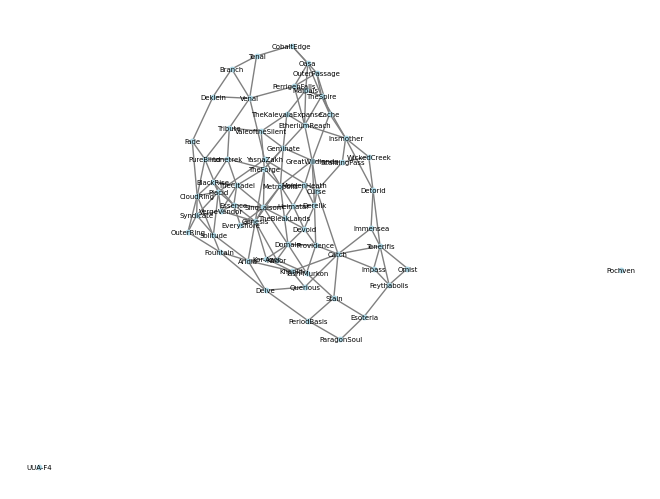

In [367]:

import networkx as nx
import matplotlib.pyplot as plt

# Assume 'graph' is your original graph and it already exists with 'region_name' attributes set for each node

# Create a new graph for regions
G_region = nx.Graph()

# Retrieve unique regions by extracting 'region_name' attributes from all nodes
unique_regions = set(nx.get_node_attributes(graph, 'region_name').values())
G_region.add_nodes_from(unique_regions)

for node in G_region.nodes():
    nx.set_node_attributes(G_region, {node: {'region_ID': None}})

# Add edges based on original graph's inter-region connections
for (node1, node2) in graph.edges():
    region1 = graph.nodes[node1]['region_name']
    region2 = graph.nodes[node2]['region_name']
    
    if region1 != region2:
        G_region.add_edge(region1, region2)
        




 


# Optional: Use a layout to visualize the graph better
pos = nx.spring_layout(G_region)  # This spreads nodes to minimize overlaps in large graphs
nx.draw(G_region, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=10, font_size=5)
plt.show()


In [369]:
# Iterate over nodes in the graph
for node in G_region.nodes:
    # Get the region name from the node's attributes
    region_name = node
    
    # Get the corresponding region ID from the filtered_regions dictionary
    # Here we assume that every region_name will have a corresponding region_ID
    region_ID = filtered_regions[region_name]
    
    # Update the node with the region_ID as a new attribute
    G_region.nodes[node]['region_ID'] = region_ID
    
# Print all nodes with their attributes to verify
for node, attrs in G_region.nodes(data=True):
    print(f"Node {node} has attributes {attrs}")
seen_values = set()
filtered_regions = {}



Node Branch has attributes {'region_ID': 10000055}
Node Lonetrek has attributes {'region_ID': 10000016}
Node TheSpire has attributes {'region_ID': 10000018}
Node TheForge has attributes {'region_ID': 10000002}
Node Heimatar has attributes {'region_ID': 10000030}
Node Solitude has attributes {'region_ID': 10000044}
Node Genesis has attributes {'region_ID': 10000067}
Node Domain has attributes {'region_ID': 10000043}
Node Delve has attributes {'region_ID': 10000060}
Node MoldenHeath has attributes {'region_ID': 10000028}
Node VergeVendor has attributes {'region_ID': 10000068}
Node YasnaZakh has attributes {'region_ID': 10001000}
Node PureBlind has attributes {'region_ID': 10000023}
Node Everyshore has attributes {'region_ID': 10000037}
Node OuterRing has attributes {'region_ID': 10000057}
Node Fountain has attributes {'region_ID': 10000058}
Node BlackRise has attributes {'region_ID': 10000069}
Node Catch has attributes {'region_ID': 10000014}
Node GreatWildlands has attributes {'region_I

In [370]:
G_region.nodes['Branch']

{'region_ID': 10000055}

In [371]:
nx.write_graphml(G_region, 'galaxy_region_graph.graphml')

In [10]:
def extract_region_coords(filename):
    with open(filename, 'r') as file:
        data = yaml.safe_load(file)
        return data.get('center', None)

def get_regiondata(galaxy_path):
    
    region_dict = {}
    
    print("Processing galaxy: ", galaxy_path)
    for region in os.listdir(galaxy_path):
        print("Processing region:", region)
        region_directory = os.path.join(galaxy_path, region)
        if os.path.isdir(region_directory):
            # region_dict = process_region(region_directory)
            
    
    

        
            
            region_ID = extract_regionID(os.path.join(region_directory, 'region.staticdata'))
            region_coordinates = extract_region_coords(os.path.join(region_directory, 'region.staticdata'))
            
            region_dict[region] = {'region_ID': region_ID, 'X_coordinate': region_coordinates[0], 'Y_coordinate': region_coordinates[1], 'Z_coordinate': region_coordinates[2]}
    
    return region_dict






In [11]:
galaxy_path = r'C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sde\fsd\universe\eve'  # Replace with the actual path

region_coordds = get_regiondata(galaxy_path)

Processing galaxy:  C:\Users\raphc\Downloads\sde-20240227-TRANQUILITY\sde\fsd\universe\eve
Processing region: A821-A
Processing region: Aridia
Processing region: BlackRise
Processing region: Branch
Processing region: Cache
Processing region: Catch
Processing region: CloudRing
Processing region: CobaltEdge
Processing region: Curse
Processing region: Deklein
Processing region: Delve
Processing region: Derelik
Processing region: Detorid
Processing region: Devoid
Processing region: Domain
Processing region: Esoteria
Processing region: Essence
Processing region: EtheriumReach
Processing region: Everyshore
Processing region: Fade
Processing region: Feythabolis
Processing region: Fountain
Processing region: Geminate
Processing region: Genesis
Processing region: GreatWildlands
Processing region: Heimatar
Processing region: Immensea
Processing region: Impass
Processing region: Insmother
Processing region: J7HZ-F
Processing region: Kador
Processing region: Khanid
Processing region: Kor-Azor
Proc

In [12]:
region_coordds['Aridia']

{'region_ID': 10000054,
 'X_coordinate': -3.68177411221382e+17,
 'Y_coordinate': 1.8612570807883984e+16,
 'Z_coordinate': -7.777031568673328e+16}

In [14]:
import networkx as nx
# Load the GraphML file
G = nx.read_graphml("galaxy_region_graph.graphml")


In [16]:
G.nodes['Branch']

{'region_ID': 10000055}

In [21]:
# Iterate over each node and add coordinates based on 'region_name'
for node in G.nodes():
    region_name = node
    # Check if the region name exists in the coordinates dictionary
    if region_name in region_coordds:
        # Get the coordinate values
        coords = region_coordds[region_name]
        # Set the coordinates as attributes for the node
        G.nodes[node].update({
            'X_coordinate': coords['X_coordinate'],
            'Y_coordinate': coords['Y_coordinate'],
            'Z_coordinate': coords['Z_coordinate']
        })


In [22]:
G.nodes['Branch']

{'region_ID': 10000055,
 'X_coordinate': -1.4583195703471386e+17,
 'Y_coordinate': 6.691524732995556e+16,
 'Z_coordinate': 4.127179250939767e+17}

In [24]:
nx.write_graphml(G, 'galaxy_region_graph_coords.graphml')